In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.animation as animation

In [102]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16


## 1. Fundamential diagrams

In [8]:
n_lane = [1, 2]
v_max = 5

directory = 'calculate/data/'
file_name = 'fundamental'

In [28]:
tabels_fundamential = [pd.read_csv(directory+file_name+f"_lane_{n}_v_{v_max}.csv") for n in n_lane]
tabels_v_3 = pd.read_csv(directory+file_name+f"_lane_{2}_v_{3}.csv")

In [29]:
rho = [np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel['rho'].values]) for tabel in tabels_fundamential]
flow = [np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel['flow'].values]) for tabel in tabels_fundamential]

rho_3 = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabels_v_3['rho'].values])
flow_3 = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabels_v_3['flow'].values])

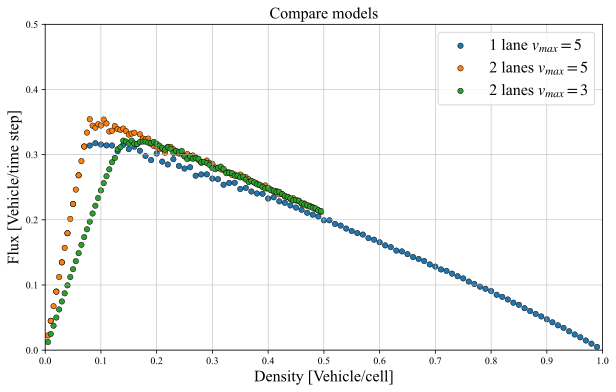

In [32]:
fig = plt.figure(figsize=(10,6), dpi=300)

#for i in range(rho[i_tabl].shape[1]):
#    label = f'lane {i}'
#    plt.plot(rho[i_tabl][:,i], flow[i_tabl][:,i], label=label, linewidth=1)
    
label = "all lane"
plt.scatter(rho[0].mean(axis=1), flow[0].mean(axis=1), label='1 lane $v_{max}='+str(v_max)+'$', edgecolors='black', s=30, linewidths=0.5)
plt.scatter(rho[1].mean(axis=1), flow[1].mean(axis=1), label='2 lanes $v_{max}='+str(v_max)+'$', edgecolors='black', s=30, linewidths=0.5)
plt.scatter(rho_3.mean(axis=1), flow_3.mean(axis=1), label='2 lanes $v_{max}='+str(3)+'$', edgecolors='black', s=30, linewidths=0.5)

plt.ylim(0,0.5)
plt.xlim(0,1)
plt.xticks(np.linspace(0,1,11))
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
plt.title(r'Compare models', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

## 2. Bus research

In [131]:
directory = 'calculate/data/'
file_name = 'bus'
n_cells = 1000
# variable 
steps = [1000]+[1000, 200, 100, 50]+[100, 50] #[1000, 1000, 200, 100, 50, 50, 50, 100, 100]
n_station = [0]+[1, 5, 10, 20]+[5, 10]    #[0, 1, 5, 10, 20, 5, 10, 5, 20]
colors = ['#55C144']+['#123F73', '#19579F', '#2378DC', '#71A8E8']+['#F5A623', '#F9C979']
tabels_bus = []
vel_average = []

In [132]:
for step, stat in zip(steps, n_station):
    name = directory + file_name + f"_step_{step}_station_{stat}.csv"
    tabels_bus.append(pd.read_csv(name))

In [133]:
vel_buses = [[float(row.split('[')[1].split(']')[0]) for row in tabel['velosity_av_typed'].values] for tabel in tabels_bus]

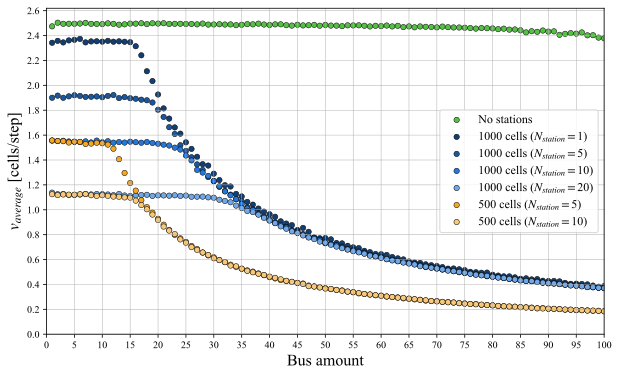

In [142]:
fig = plt.figure(figsize=(10,6), dpi=300)

buses_arr = np.arange(1, 101)

for average, n_star, step_station, color in zip(vel_buses, n_station, steps, colors):
    if n_star == 0:
        label = "No stations"
    else:
        label = f"{int(step_station)*n_star} cells ("+"$N_{station}=$"+str(n_star)+')' #+f" step: {int(step_station)})"
        
    plt.scatter(buses_arr, average, label=label, edgecolors='black', s=30, linewidths=0.5, c=color)

#plt.ylim(0,2.5)
plt.xlim(0,100)
plt.xticks(np.linspace(0,100,101)[::5])
plt.yticks(np.linspace(0,2.7,28)[::2])
plt.legend(loc='center right', fontsize=fs-4)
plt.xlabel(r'Bus amount',  fontsize = fs)
plt.ylabel(r'$v_{average}$ [cells/step]',  fontsize = fs)
#plt.title(f'Road length {n_cells} cells', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

## 3. Research system bus-vehicle

In [ ]:
peop_arr = np.array([100, 300, 1000, 1600])
tabels_city = [pd.read_csv(f'data/tabel_city_{people}.csv', index_col=0) for people in peop_arr]
tabels_vehicle = [pd.read_csv(f"data/tabel_veh_{people}.csv", names=['bus', 'hdv'], header=None, skiprows=1) for people in peop_arr]

__Vehicle type characteristics__

In [11]:
# in columns is average velosity for all vehicles 
# for get average velosity for vehicle should devision to amount of vehicle
tabels_vehicle[0].astype(str).head(4)

,bus,hdv
0,0.0,[2.48352]
1,[1.238],[2.45890909]
2,[1.278],[2.46485714]
3,[1.29],[2.47490722]


In [18]:
def delet_skob(s):
    return re.sub('\[|\]', '', s)

In [19]:
amount_hdv = ((peop_arr.reshape(4,1))@(proportion.reshape(1, 101))).astype(int)[:,::-1]
amount_bus = ((peop_arr.reshape(4,1))@(proportion.reshape(1, 101))).astype(int)
amount_bus = np.ceil(amount_bus/bus_capasity).astype(int)
rho_bus = amount_bus/n_cells/n_lane
rho_hdv = amount_hdv/n_cells/n_lane

In [20]:
velosity_bus = np.array([[val for val in tab['bus'].apply(delet_skob).astype(float).values] for tab in tabels_vehicle])
velosity_hdv = np.array([[val for val in tab['hdv'].apply(delet_skob).astype(float).values] for tab in tabels_vehicle])

__Lanes characteristics__

In [21]:
rho = np.array([[np.fromstring(val[1:-1:], sep=',') for val in tab['rho'].values] for tab in tabels_city])
flow = np.array([[np.fromstring(val[1:-1:], sep=',') for val in tab['flow'].values] for tab in tabels_city])
flow.mean(axis=2).shape

(4, 101)

In [ ]:
velosity_all = flow.mean(axis=2)/rho.mean(axis=2)

In [ ]:
fs = 12

m, n = int(len(peop_arr)/2), 2

fig, ax = plt.subplots(figsize=(10,8), nrows=m, ncols=n, tight_layout=True, dpi=300);

for i in range(m):
    for j in range(n):
        #lane
        for k in range(rho.shape[2]):
            label = f'lane {k}'
            ax[i, j].scatter(proportion, flow[m*i+j,:,k], label=label, edgecolors='black', s=20, linewidths=0.5)
        label = "all lane"
        ax[i, j].scatter(proportion, flow.mean(axis=2)[m*i+j], label=label, color='green', edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].legend(loc='upper right', fontsize=fs)
        ax[i, j].set_xlim(0,1)
        ax[i, j].set_ylim(0,0.5)
        ax[i, j].set_title(f'Initial density {peop_arr[m*i+j]/n_cells/n_lane} ({peop_arr[m*i+j]} people)', fontsize=fs+2, pad=10)
        ax[i, j].set_xlabel(r'Proportion [passengers/drivers]',  fontsize = fs)
        ax[i, j].set_ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
        ax[i, j].set_xticks(np.arange(0, 1.1, step=0.1))
        ax[i, j].grid(linewidth=0.5)
        
plt.show()

In [ ]:
fs = 12

m, n = int(len(peop_arr)/2), 2

fig, ax = plt.subplots(figsize=(10,8), nrows=m, ncols=n, tight_layout=True, dpi=300);

for i in range(m):
    for j in range(n):

        ax[i, j].scatter(proportion, velosity_bus[m*i+j,:], label='Bus', edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].scatter(proportion, velosity_hdv[m*i+j,:], label='HDV', edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].scatter(proportion, velosity_all[m*i+j,:], label="All vehicle", color='green', edgecolors='black', s=10, linewidths=0.5)
        ax[i, j].set_xlim(0,1)
        #ax[i, j].set_ylim(0,2)
        ax[i, j].set_xlabel(r'Proportion [passengers/drivers]',  fontsize = fs)
        ax[i, j].set_ylabel(r'$v_{average}$ [cells/step]',  fontsize = fs)
        ax[i, j].set_xticks(np.arange(0, 1.1, step=0.1))
        
        ax[i, j].legend(loc='lower right', fontsize=fs)
        ax[i, j].set_title(f'Initial density {peop_arr[m*i+j]/n_cells/n_lane} ({peop_arr[m*i+j]} people)', fontsize=fs+2, pad=10)

        ax[i, j].grid(linewidth=0.5)
        
plt.show()

In [ ]:
fs = 12

m, n = int(len(peop_arr)/2), 2

fig, ax = plt.subplots(figsize=(10,8), nrows=m, ncols=n, tight_layout=True, dpi=300);

for i in range(m):
    for j in range(n):
        #lane
        ax[i, j].scatter(proportion, (velosity_bus*rho_bus)[m*i+j,:], label="Bus", edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].scatter(proportion, (velosity_hdv*rho_hdv)[m*i+j,:], label="HDV", edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].legend(loc='upper right', fontsize=fs)
        ax[i, j].set_xlim(0,1)
        ax[i, j].set_ylim(0,0.3)
        ax[i, j].set_title(f'Initial density {peop_arr[m*i+j]/n_cells/n_lane} ({peop_arr[m*i+j]} people)', fontsize=fs+2, pad=10)
        ax[i, j].set_xlabel(r'Proportion [passengers/drivers]',  fontsize = fs)
        ax[i, j].set_ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
        ax[i, j].set_xticks(np.arange(0, 1.1, step=0.1))
        ax[i, j].grid(linewidth=0.5)
        
plt.show()